In [ ]:
#Secara teknis, ini disebut sebagai rule-based image processing model atau filter-based edge detection.

!pip install scikit-image matplotlib

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, feature
from google.colab import files


In [ ]:
uploaded = files.upload()  # Pilih dan upload gambar: hestain.png, onion.png, dll.


Saving kentang.jpg to kentang (1).jpg


In [ ]:
def deteksi_tepi(gambar_path):
    # Baca dan konversi ke grayscale
    gambar = io.imread(gambar_path)
    gray = color.rgb2gray(gambar)

    # Deteksi tepi dengan metode Canny
    canny = feature.canny(gray)

    # Deteksi tepi dengan metode Sobel dan Prewitt
    sobel = filters.sobel(gray)


    # Konversi ke citra biner
    sobel_bin = sobel > 0.05

    # Hitung jumlah piksel putih
    canny_count = np.sum(canny)
    sobel_count = np.sum(sobel_bin)

    # Tampilkan hasil
    fig, ax = plt.subplots(1, 4, figsize=(18, 6))
    ax[0].imshow(gambar)
    ax[0].set_title('Original')

    ax[1].imshow(canny, cmap='gray')
    ax[1].set_title(f'Canny: {int(canny_count)}')

    ax[2].imshow(sobel_bin, cmap='gray')
    ax[2].set_title(f'Sobel: {int(sobel_count)}')

    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.show()

    return {
        'Sobel': int(sobel_count),
        'Canny': int(canny_count)
    }


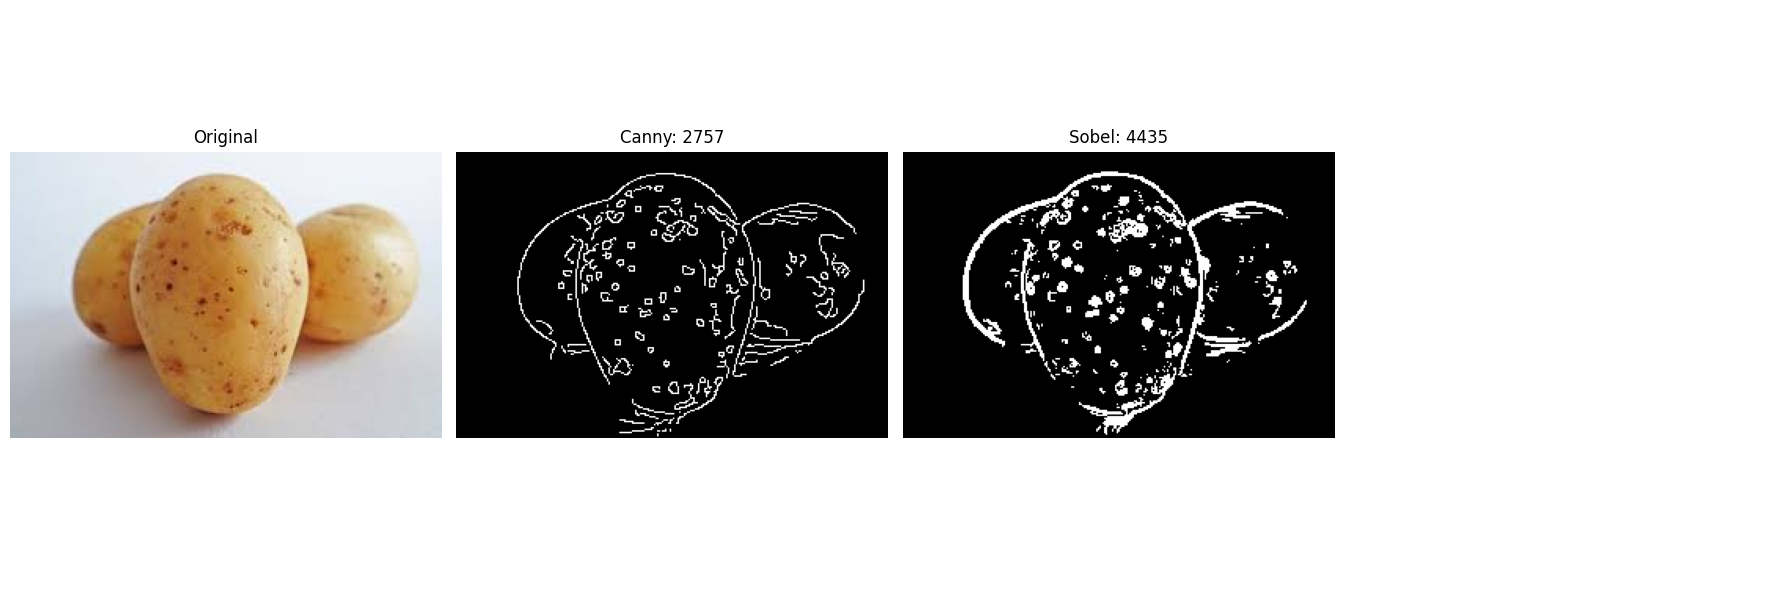

{'Sobel': 4435, 'Canny': 2757}


In [ ]:
# Contoh: deteksi pada gambar 'hestain.png'
hasil = deteksi_tepi('/content/drive/MyDrive/Colab Notebooks/kentang.jpg')
print(hasil)


In [ ]:
uploaded = files.upload()

Saving kolam renang.jpg to kolam renang (1).jpg


In [ ]:
from skimage import exposure  # tambahkan ini

def deteksi_dan_hitung_kontras(gambar_path):
    gambar = io.imread(gambar_path)
    gray = color.rgb2gray(gambar)

    # ✨ Perkuat kontras menggunakan adaptive histogram equalization
    gray_enhanced = exposure.equalize_adapthist(gray, clip_limit=0.03)

    # Deteksi tepi (lebih sensitif)
    edge_canny = feature.canny(gray_enhanced, sigma=1.0)
    edge_sobel = filters.sobel(gray_enhanced) > 0.02  # threshold diturunkan
    # Hitung piksel putih
    count_canny = int(np.sum(edge_canny))
    count_sobel = int(np.sum(edge_sobel))
    # Tampilkan hasil deteksi tepi
    fig, ax = plt.subplots(1, 4, figsize=(18, 6))
    ax[0].imshow(gambar)
    ax[0].set_title('Original')
    ax[1].imshow(edge_canny, cmap='gray')
    ax[1].set_title(f'Canny: {count_canny} px')
    ax[2].imshow(edge_sobel, cmap='gray')
    ax[2].set_title(f'Sobel: {count_sobel} px')
    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.show()

    return {
        'Sobel': count_sobel,
        'Canny': count_canny
    }


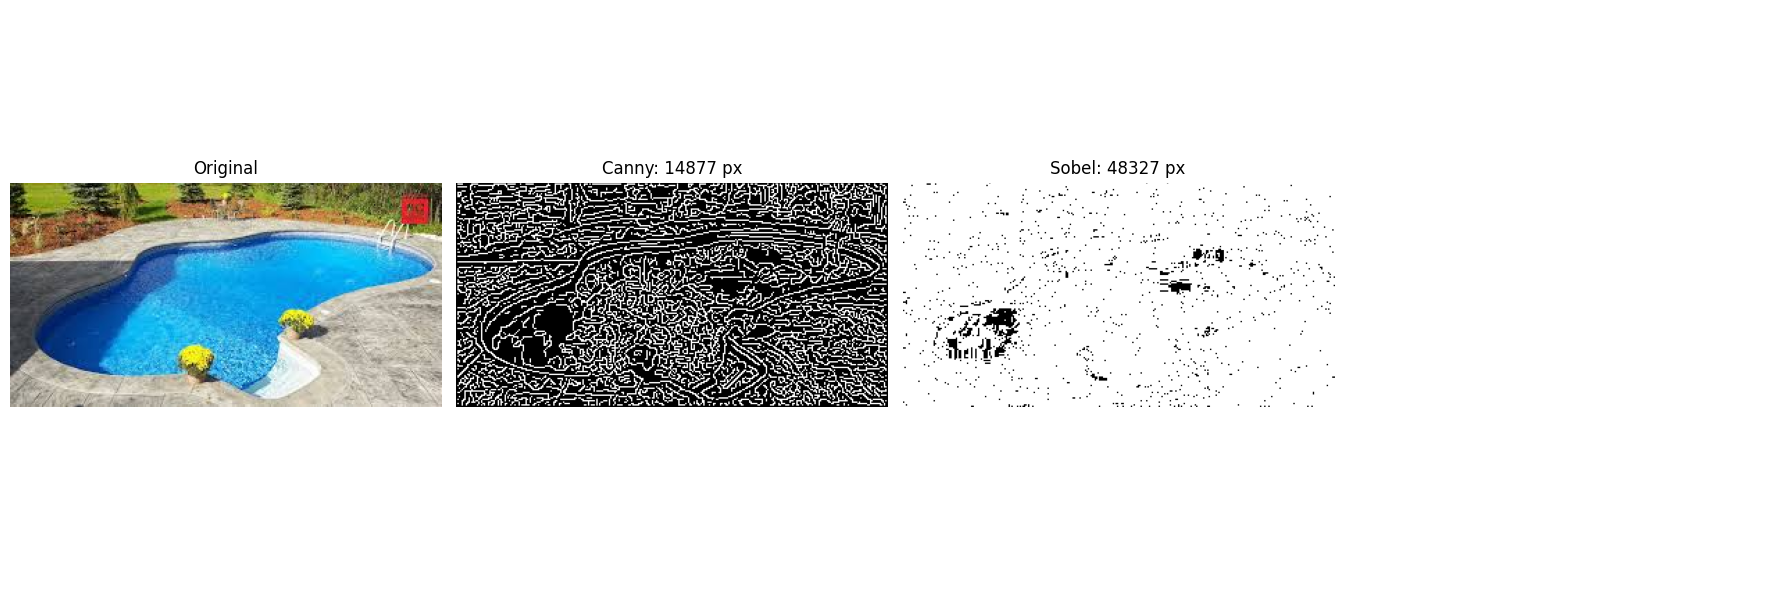

In [ ]:
hasil = deteksi_dan_hitung_kontras('/content/drive/MyDrive/Colab Notebooks/kolam renang.jpg')